# Assignment 3 - Supervised Learning

## *Joaquin Menendez*
Netid:  *jm622*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)** What is the likelihood function of the data that we will wish to maximize?

$$L(x) = P(Y|X) = \prod_{i=1}^{N} [f(Y = y_i | X =x_i)]_{y_{i=1}} [Y = y_i | X =x_i)]_{y_{i=0}}$$

$$= \prod_{i=1}^{N} [\dfrac{1}{1+e^{-mx_i}}]_{y_{i=1}} \: [1 - \dfrac{1}{1+e^{-mx_i}}]_{y_{i=0}}$$

$$L(x) = \prod_{i=1}^{N} (\dfrac{1}{1+e^{-mx_i}})^{y_i} \: (\dfrac{e^{-mx_i}}{1+e^{-mx_i}})^{1-y_i}$$

**(b)** Since a logarithm is a monotonic function, maximizing the  f(x)f(x)  is equivalent to maximizing  ln[f(x)]ln⁡[f(x)] . Express part (a) as a cost function of the model parameters,  C(w)C(w) , that is the negative of the logarithm of (a).

The cost function used in logistic regression is the cross entropy
$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\hat{y})+ (1-y_i)\: \log(1-\hat{y}))$$

$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i \log(\dfrac{1}{1+e^{-mx_i}}) + (1 - y_i)\: \log(\dfrac{e^{-mx_i}}{1+e^{-mx_i}})$$

$$ C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} y_i(\log(1) - \log(1+e^{-mx_i})) + (1 - y_i)\:(\log(e^{-mx_i}) - \log(1+e^{-mx_i})) $$

$$ C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} \log(e^{-mx_i})(1-y_i) - (\log (1 + e^{-mx_i}))$$

$$C(w) = - \dfrac{1}{N} \sum_{i = 1}^{N} \log(e^{-wx_i})(1-y_i) - (\log(1+e^{-wx_i}))$$
$$C(w) =  \dfrac{1}{N} \sum_{i = 1}^{N} wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$

**(c)**
$$\frac{\partial C}{\partial w} = \dfrac{1}{N} \sum_{i = 1}^{N}  wx_i(1-y_i) + (\log(1+e^{-wx_i}))$$


$$ =  \dfrac{1}{N} \sum_{i = 1}^{N} x_i(1-y_i) + \left( \frac{1}{1+e^{-wx_i}} e^{-wx_i} (-x_i)\right)$$

$$ = \dfrac{1}{N} \sum_{i = 1}^{N}  x_i(1-y_i)  - (\frac{x_i e^{-wx_i}}{1+e^{-wx_i}})$$

$$ \frac{\partial C}{\partial w}=  \dfrac{1}{N} \sum_{i = 1}^{N}  x_i \left( (1-y_i) -  \frac{x_i e^{-wx_i}}{1+e^{-wx_i}}\right)$$

So, for $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$ = 



$$\big[\frac{\nabla (w)}{w_0} , 
\frac{\nabla (w)}{w_1} ,
\frac{\nabla (w)}{w_2} \big]$$

$$\begin{bmatrix} \dfrac{1}{N} \sum_{i = 1}^{N} (1-y_i)\: - \frac{e^{-w}}{1+e^{-w}} , \\
 \dfrac{1}{N} \sum_{i = 1}^{N}   \left( x_{i,1}(1-y_i)\: - \frac{e^{-wx_{i,1}}}{1+e^{-wx_{i,1}}}\right) , \\
 \dfrac{1}{N} \sum_{i = 1}^{N} \left( x_{i,2}(1-y_i)\: - \frac{e^{-wx_{i,2}}}{1+e^{-wx_{i,2}}}\right) \end{bmatrix}$$

**(d)**

The gradient update equation is defined as $$ x^{(x+i)} = x^i - \eta \nabla f(x^i)$$

given that sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}$ We could replace $\frac{e^{-wx_{i,1}}}{1+e^{-wx_{i,1}}}$ as $1 - \sigma(W^T x_i)$

$$wj = wj - \dfrac{\eta}{N} \sum_{i = 1}^{N}  x_{i}\left((1-y_i)\: - (1-\sigma(\mathbf{w}^T \mathbf{x}_i)\right)$$

$$wj = wj - \dfrac{\eta}{N} \sum_{i = 1}^{N}  x_{i}\left(-y_i + \sigma(\mathbf{w}^T \mathbf{x}_i)\right)$$

until $wj$ converge on one point.

**(e)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
df = pd.read_csv('./data/A3_Q1_data.csv')

[]

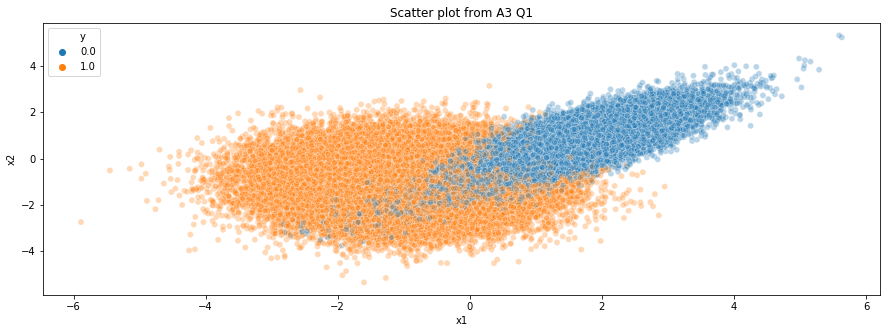

In [2]:
plt.figure(figsize=(15,5))
g = seaborn.scatterplot(x = 'x1', y ='x2', hue = 'y', alpha = 0.3, data = df)
plt.title('Scatter plot from A3 Q1')
g.plot()

The data seem to be separable. The class 1 seems to have a lower median than class 2, also the range of x values is evidently more positive to the class 0 than class 1.
Nevertheles, data does not seem to be the best candidate for a logistic regression. Given the fact that the class 1 seems to surround part of class 0, there is no way of divide these categories  using a sigmoid curve without having False Negatives. A better approach would be use a QDA model to classify the data. Given that QDA assumes a quadratic decision boundary it would be more adequate 'adjust' the decision boundaryto the shape shown in the data.

**(f)**

In [3]:
df.info() # There is no evidence of null values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
x1    100000 non-null float64
x2    100000 non-null float64
y     100000 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


Text(0.5,0.98,'Histogram of predictor variables')

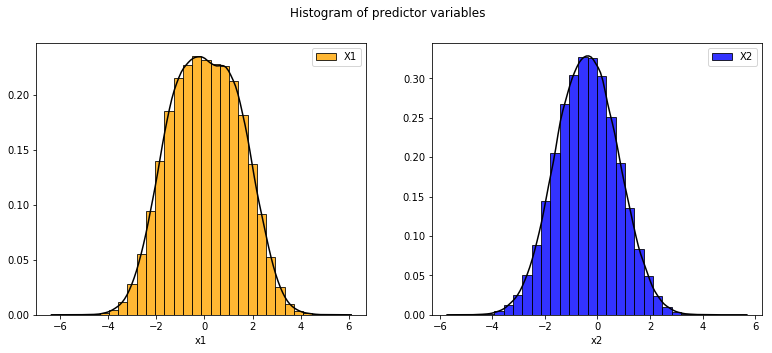

In [4]:
fig, (ax1,ax2) =plt.subplots(1,2) #we plot the distribution of the predictors
seaborn.distplot(df['x1'], kde = True, bins= 30, color= 'orange', hist_kws = {'edgecolor' : 'black', 'alpha': .8}, kde_kws={'color':'black'}, label= 'X1', ax= ax1)
seaborn.distplot(df['x2'], kde = True, bins= 30, color= 'b', hist_kws = {'edgecolor' : 'black', 'alpha': .8}, kde_kws={'color':'black'}, label= 'X2', ax= ax2)
ax1.legend()
ax2.legend()
fig.set_figheight(5)
fig.set_figwidth(13)
plt.suptitle('Histogram of predictor variables')

In [5]:
df.corr() # We evaluate the correlation between the predictors and the output

,x1,x2,y
x1,1.000000,0.624645,-0.724029
x2,0.624645,1.000000,-0.515814
y,-0.724029,-0.515814,1.000000


There are no mayor differences between the classes. Both seems to have similar SD and N sample. Also, there are no missing values in any of the classes. The data do not seem to need any type of preprocessing. The fact that both parameters have a normal distribution (even tought with different means and SD) and that they seem to have a different correlations against the predictor (despite of not being extremely different) suggest again that QDA could be a more adequate model.

**(g)**

In [6]:
# New and upgrade function
def logistic_prob_2 (dataset,weight):
    values = dataset @ weight.T 
    return 1/(1+np.exp(-values)).reshape(1,-1) # List of len = to dataset rows 

**(h)**

In [7]:
# make a new and better cost funct
def cost_function_2(dataset,weight):  
    x = dataset.drop(['y'], axis = 1)
    x.insert(0,'x0',np.array([1]*dataset.shape[0])) # will add a column of ones as X0 to the dataframe so I can feed with a df format.
    y = dataset['y'].values
    x = x.values
    prob_y = logistic_prob_2(x,weight)   
    
    cost = np.where(y== 0,np.log(1-prob_y), np.log(prob_y))
    sum_cost = np.sum(cost)/(x.shape[0] * -1)
    return sum_cost

In [71]:
w = np.array([[1,1,1]])
cost_function_2(train,w) #My cost function estimates the cost given the 3 weights. This function is more efficient. Go with this
dummy = np.array([[1,1,1]])
logistic_prob_2(dummy,w) #Testing my sigmoid func

array([[0.95257413]])

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.


In [9]:
#train_df = df.sample(frac=.70, replace= False)
from sklearn.model_selection import train_test_split # Splitting train/test data
train, test = train_test_split(df, test_size=0.3)

In [11]:
def prob_single_data_2(dataset,w,learning_rate):   #[upgraded function] it calculates all inside the grad_des function
    x = dataset.drop(['y'], axis = 1)
    x.insert(0,'x0',np.array([1]*dataset.shape[0])) # will add a column of ones as X0 to the dataframe
    y = dataset['y'].values
    x = x.values
    #print(x.shape)
    sigmoid = logistic_prob_2(x,w) # call sigmoid fuction
    sig_y = (sigmoid - y).reshape(-1,1).T
    inside_sum = sum(sig_y @ x)
    #return  sig_y, y, x
    return (learning_rate/x.shape[0]) * inside_sum

In [12]:
def grad_desc(dataset,w,learning_rate, stopping_criteria):
    wj_old = w
    wj_delta  = 1
    cost = []
    while wj_delta > stopping_criteria:
        wj = wj_old -  prob_single_data_2(dataset,wj_old,learning_rate)
        cost.append(cost_function_2(dataset,wj_old))
        wj_delta = np.linalg.norm(wj_old - wj) #estimate ell2 for the substraction of my weights
        #print('wj delta :', wj_delta)
        wj_old = wj 
    return wj, cost   


**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

In [18]:
w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) #Initialize randomly some weights
learning_rate = 0.5 #eta learning rate should be something close to 10-3 to 10-6
stopping_criteria = 0.000001
weights1, cost1 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.25
weights2, cost2 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.1
weights3, cost3 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 0.01
weights4, cost4 = grad_desc(train,w,learning_rate,stopping_criteria)

In [17]:
learning_rate = 5
weights5, cost5 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 7
weights6, cost6 = grad_desc(train,w,learning_rate,stopping_criteria)
learning_rate = 10
weights7, cost7 = grad_desc(train,w,learning_rate,stopping_criteria)

**(h)**

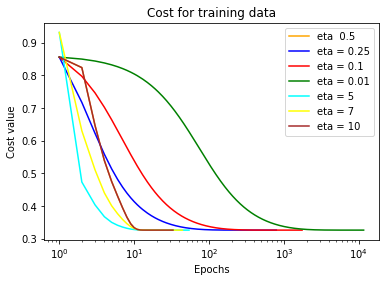

In [64]:
plt.title('Cost for training data')
plt.xlabel('Epochs')
plt.ylabel('Cost value')
plt.semilogx()
plots = [cost,cost2,cost3,cost4,cost5,cost6,cost7]
labels = ['eta  0.5','eta = 0.25','eta = 0.1','eta = 0.01', 'eta = 5', 'eta = 7', 'eta = 10']
colors = ['orange','b','r','g','cyan','yellow','brown']
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)

(0.3, 0.5)

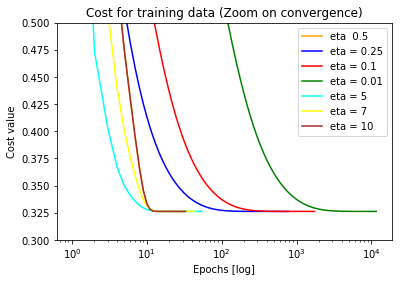

In [65]:
plt.title('Cost for training data (Zoom on convergence)')
plt.xlabel('Epochs [log]')
plt.ylabel('Cost value')
plt.semilogx()
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)
plt.ylim([0.3,.5])

In [67]:
print('Lower eta',weights1,weights2,weights3,weights4,'High eta',weights5,weights6,weights7, sep = '\n') # All arrive to the same value

Lower eta
[[-0.17961038 -1.92404923 -0.42221665]]
[[-0.17964183 -1.92402199 -0.42224674]]
[[-0.17973578 -1.92393693 -0.42233713]]
[[-0.18096657 -1.92246604 -0.42356988]]
High eta
[[-0.17957652 -1.92407761 -0.42218439]]
[[-0.17957766 -1.92407667 -0.42218547]]
[[-0.17957801 -1.9240764  -0.42218576]]


In [59]:
w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) #Initialize randomly some weights
learning_rate = 0.5 #eta learning rate should be something close to 10-3 to 10-6
stopping_criteria = 0.000001
test_weights1, test_cost1 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.25
test_weights2, test_cost2 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.1
test_weights3, test_cost3 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 0.01
test_weights4, test_cost4 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 5
test_weights5, test_cost5 = grad_desc(test,w,learning_rate,stopping_criteria)
learning_rate = 7
test_weights6, test_cost6 = grad_desc(train,w,learning_rate,stopping_criteria)

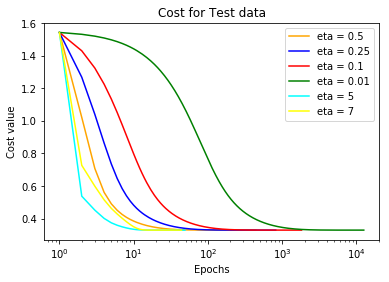

In [29]:
plt.title('Cost for Test data')
plt.xlabel('Epochs [log]')
plt.ylabel('Cost value')
plt.semilogx()
plots = [test_cost1,test_cost2,test_cost3,test_cost4, test_cost5, test_cost6]
labels = ['eta = 0.5','eta = 0.25','eta = 0.1','eta = 0.01', 'eta = 5' , 'eta = 7']
colors = ['orange','b','r','g','cyan','yellow']
for n,cost in enumerate(plots):
    plt.plot(range(1,len(cost)+1),cost, color = colors[n])
plt.legend(labels= labels)

What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

When we use a smaller learning rate the time needed to converge increase.  At the same time we see that when we increase the learning rate the algorithm also needs more iterations.Given that the descend is smoother in the bigger the eta,  we could argue that this weights are going to be more precise when they converge.  Despite the fact that there is a difference in the weights decreasing w0 and w2 when the eta is lower, there is no evidence of a big difference. We could proceed from now with a eta = 0.1 given the cost/precision. 

In [70]:
learning_rate = 0.1
w = weights3 #eta 0.1

(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance.

Text(0.5,1,'Probability of being Class 1 for x1 and x2')

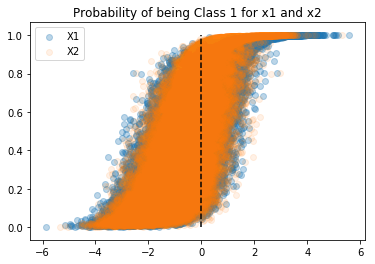

In [135]:
#First I want to check my results using the weights from my gradient fucntion. This would be using all my training dataset: 
# X = x1, x2
# Y = y
X = train.drop(['y'], axis = 1)
X.insert(0,'x0',np.array([1]*train.shape[0])) # will add a column of ones as X0 to the dataframe
y = train['y'].values
X = X.values  #Scikit does not like pandas
plt.scatter(X[:,1],logistic_prob_2(X,w).T, label='X1', alpha = 0.3)
plt.scatter(X[:,2],logistic_prob_2(X,w).T, label = 'X2', alpha = 0.1)
plt.vlines(x= 0, ymin= 0 , ymax= 1, linestyles='--')
plt.legend()
plt.title('Probability of being Class 1 for x1 and x2')


In [220]:
import sklearn as sk
import scipy as sp
model = sk.model_selection.StratifiedKFold(n_splits=10)

In [223]:
# Cross Validation and training
X = train.drop(['y'], axis = 1)
X = X.values  #Scikit does not like pandas
y = train['y'].values
model.get_n_splits(X,y)
print(model)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
weights = np.zeros([10,3])
n = 0
for train_index, test_index in model.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(y_train)
    w = np.array([[np.random.random(),np.random.random(),np.random.random()]]) # Randomizing the initial w
    dataset = pd.DataFrame({'x1': X_train[:,0],'x2': X_train[:,1],'y': y_train[:]})
    weight, cost = grad_desc(dataset,w,learning_rate,stopping_criteria) # Is going to estimate the eights for every training chunck in my cross_validation
    weights[n] = weight # I save my weights to average after
    
    X_test = pd.DataFrame({'x1': X_test[:,0],'x2': X_test[:,1],'y': y_test[:]})
    X_test.insert(0,'x0',np.array([1]*X_test.shape[0]))
    X_test = X_test.drop(['y'], axis = 1)
    y_hat = logistic_prob_2(X_test.values,weight) # I am going to get the probability of my y_hat for every x_test chunk
    y_hat[y_hat<.5] = 0
    y_hat[y_hat>=.5] = 1 # I make my outputs binary. If I would like to modify something I would change the > 0.5
    
    print(y_hat[0],y_test, len(y_hat[0]), len(y_test)) # checking things
    
    fpr, tpr, _ = sk.metrics.roc_curve(y_hat[0],y_test)  #false positive / true pos
    roc_auc = sk.metrics.auc(fpr, tpr)  # estimate area under curve
    tprs.append(sp.interp(mean_fpr, fpr, tpr)) # Append the the positive rates
    aucs.append(roc_auc)  # append roc curves
    n += 1
    

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
[0. 0. 1. ... 0. 0. 0.] [0. 0. 1. ... 0. 0. 0.] 7001 7001
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 1. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[0. 1. 1. ... 0. 0. 0.] [1. 1. 1. ... 0. 0. 0.] 7000 7000
[1. 1. 1. ... 0. 1. 1.] [1. 1. 1. ... 1. 1. 0.] 6999 6999


Text(0.5,0,'FR rate')

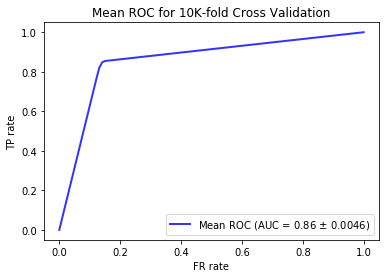

In [237]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sk.metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.legend()
plt.title('Mean ROC for 10K-fold Cross Validation')
plt.ylabel('TP rate')
plt.xlabel('FR rate')

In [244]:
avg_w = np.mean(weights, axis= 0)

print('The average W given my 10 K-fold Cross Validation is [%f,%f,%f]' % (avg_w[0],avg_w[1],avg_w[2]))


The average W given my 10 K-fold Cross Validation is [-0.179690,-1.923985,-0.422303]


 **Why do we use cross validation?**

In [214]:
We use cross validation to 

array([0.        , 0.12877907, 1.        ])

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**